<a href="https://colab.research.google.com/github/m9916/Sports-Model/blob/main/Sports_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading our Dataset
df = pd.read_csv('/content/ipl.csv')
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [3]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [4]:
df.shape

(76014, 15)

In [5]:
# Data Analysis and Cleaning
# First we will remove all unwanted columns from the dataset



In [6]:
unwanted_columns = ['mid', 'striker','non-striker', 'venue','batsman', 'bowler']

In [7]:
df['venue'].nunique()

35

In [8]:
df['batsman'].nunique()

411

In [9]:
df['bowler'].nunique()

329

In [10]:
df['bat_team'].nunique()

14

In [11]:
df['bowl_team'].nunique()

14

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [13]:
df.drop(labels=unwanted_columns, axis=1, inplace=True)

In [14]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [15]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [16]:
# We will select some popular teams for our Model

selected_team = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals', 'Mumbai Indians',
                 'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils',
                 'Sunrisers Hyderabad']

In [17]:
# Keeping only selected_team in our dataset and rest remove it

df = df[(df['bat_team'].isin(selected_team)) & (df['bowl_team'].isin(selected_team))]

In [18]:
df['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [19]:
df.shape

(53811, 9)

In [20]:
# We will remove the first 5 overs of the match as they shows no significance on deciding which team will win the match

df = df[df['overs']>=5.0]

In [21]:
df.shape

(40108, 9)

In [22]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   bat_team        40108 non-null  object 
 2   bowl_team       40108 non-null  object 
 3   runs            40108 non-null  int64  
 4   wickets         40108 non-null  int64  
 5   overs           40108 non-null  float64
 6   runs_last_5     40108 non-null  int64  
 7   wickets_last_5  40108 non-null  int64  
 8   total           40108 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 3.1+ MB


In [24]:
# We need to convert our date from string to date time format
from datetime import datetime

df['date'] = df['date'].apply(lambda x :datetime.strptime(x, '%Y-%m-%d'))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


In [26]:
# Data Preprocessing
# check missing value
df.isnull().sum()

date              0
bat_team          0
bowl_team         0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
total             0
dtype: int64

In [27]:
# Encoding part
model_df = pd.get_dummies(data=df, columns=['bat_team','bowl_team'])

In [28]:
model_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   40108 non-null  datetime64[ns]
 1   runs                                   40108 non-null  int64         
 2   wickets                                40108 non-null  int64         
 3   overs                                  40108 non-null  float64       
 4   runs_last_5                            40108 non-null  int64         
 5   wickets_last_5                         40108 non-null  int64         
 6   total                                  40108 non-null  int64         
 7   bat_team_Chennai Super Kings           40108 non-null  uint8         
 8   bat_team_Delhi Daredevils              40108 non-null  uint8         
 9   bat_team_Kings XI Punjab               40108 non-null  uint8

In [30]:
# Rearranging our columns
model_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [31]:
model_df = model_df[['date','bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [32]:
model_df.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [33]:
df['year'] = df['date'].dt.year

In [34]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total,year
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222,2008
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222,2008
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222,2008
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222,2008
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222,2008


In [35]:
# Split the data into train and test

x_train = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year <= 2016]
x_test = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year >= 2017]

In [36]:
y_train = model_df[model_df['date'].dt.year <=2016]['total'].values
y_test = model_df[model_df['date'].dt.year >=2017]['total'].values

In [37]:
# Now we have no need for our date columns in x_train and x_test data
x_train.drop(labels='date', axis=1, inplace=True)
x_test.drop(labels='date', axis=1, inplace=True)

In [38]:
len(x_test)

2778

In [39]:
x_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,0,5.1,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.2,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.3,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.4,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,61,1,5.5,58,1


In [40]:
y_train

array([222, 222, 222, ..., 208, 208, 208])

In [41]:
y_test

array([207, 207, 207, ..., 107, 107, 107])

In [42]:
pd.DataFrame(y_test).nunique()

0    26
dtype: int64

In [43]:
# Model Building using ML Models
# Linear Regression
# Regularization approach - Lasso, Ridge, ElasticNet
# Lasso Regression -
# RandomForest Regressor
# HyperParameter Tunning - Grid Search and Randomize search

In [44]:
# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [45]:
lasso = Lasso()
params = {'alpha':[1e-15, 1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [46]:
lasso_regressor = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)

In [47]:
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [48]:
print(lasso_regressor.best_params_)

{'alpha': 1}


In [49]:
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)

Lasso(alpha=1)

In [50]:
y_pred = lasso.predict(x_test)

In [51]:
y_pred

array([170.86580971, 174.25430596, 173.47515444, ..., 105.85981486,
       104.87745245,  98.97252065])

In [52]:
len(pd.DataFrame(y_pred))

2778

<Axes: ylabel='Density'>

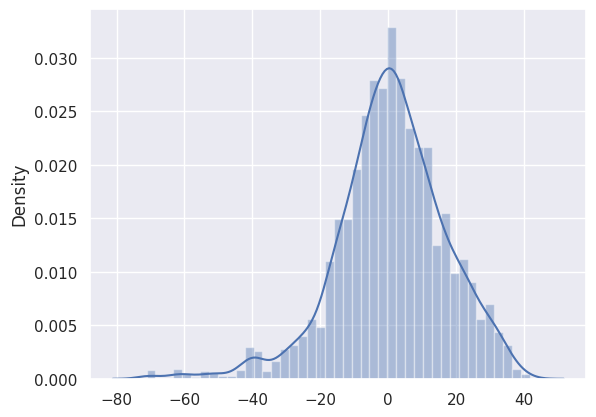

In [53]:
# Evaluation
sns.distplot(y_test - y_pred)


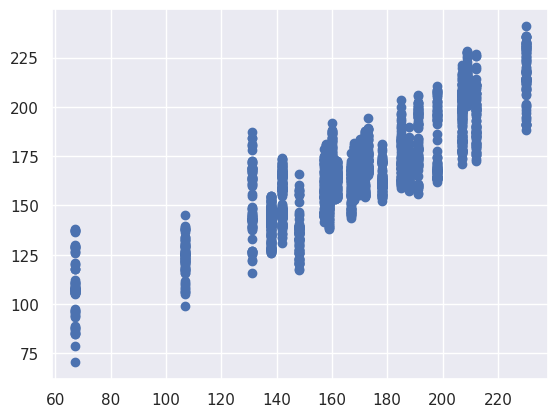

In [54]:
plt.scatter(y_test, y_pred)

In [55]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print()
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred)*100)
print()
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print()
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 12.213583996827493

MAPE: 8.411874642499965

MSE: 262.3653827960697

RMSE: 16.197696836157593


In [56]:
print("Test Accuracy",(y_test, y_pred))

Test Accuracy (array([207, 207, 207, ..., 107, 107, 107]), array([170.86580971, 174.25430596, 173.47515444, ..., 105.85981486,
       104.87745245,  98.97252065]))


In [57]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [58]:
# HyperParam Tuning - RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [59]:
# No of Trees in RF
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num =  4)]

# No of features to consider at every split
max_features = ["auto", "sqrt", "log2"]

# Max no. of levels in tree - post-prunning
max_depth = [int(x) for x in np.linspace(10, 60, num=6)]
max_depth.append(None)

# Min no of samples required to split a node
min_samples_split = [2, 5, 10]

# Min no of sample required at each leaf node
min_samples_leaf = [1, 2 , 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [60]:
# Create the random grid hyperparameter tuning method

random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [61]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions =random_grid,
                               n_iter = 10, cv=3, verbose = 1, random_state = 42, n_jobs = -1)

In [62]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 333, 566, 800]},
                   random_state=42, verbose=1)

In [63]:
rf_random.best_params_

{'n_estimators': 566,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [64]:
pred1 = rf_random.predict(x_test)

In [65]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, pred1))
print()
print("MAPE:", metrics.mean_absolute_percentage_error(y_test, pred1)*100)
print()
print("MSE:", metrics.mean_squared_error(y_test, pred1))
print()
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 13.437302097501965

MAPE: 8.872047629374467

MSE: 325.0671571588046

RMSE: 18.029618885567288


In [67]:
print("Test Accuracy", (y_test, pred1))

Test Accuracy (array([207, 207, 207, ..., 107, 107, 107]), array([180.38015658, 182.56081314, 183.2640301 , ..., 116.70530116,
       114.16679855, 113.4670685 ]))


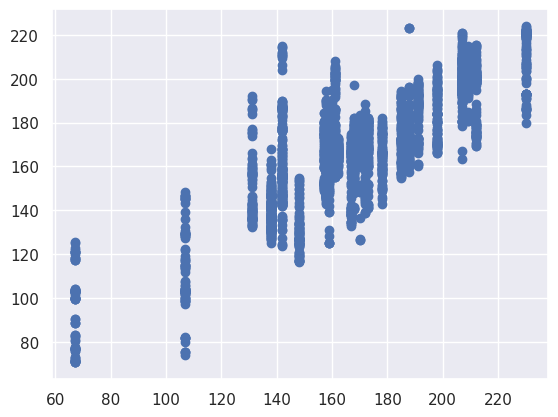

In [68]:
plt.scatter(y_test, pred1)

<Axes: ylabel='Density'>

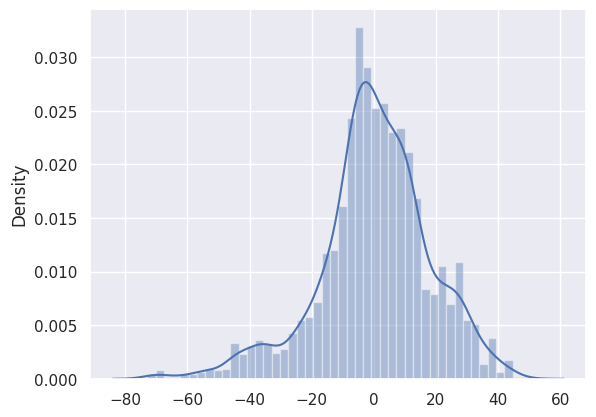

In [69]:
sns.distplot(y_test - pred1)